In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [45]:
sns.__version__

'0.11.1'

In [46]:
df=pd.read_csv("ccpp.csv",sep=',')

In [47]:
df.shape

(47840, 5)

In [48]:
df.head()

,temperature,exhaust_vacuum,ambient_pressure,relative_humidity,energy_output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47840 entries, 0 to 47839
Data columns (total 5 columns):
temperature          47840 non-null float64
exhaust_vacuum       47840 non-null float64
ambient_pressure     47840 non-null float64
relative_humidity    47840 non-null float64
energy_output        47840 non-null float64
dtypes: float64(5)
memory usage: 1.8 MB


In [50]:
df.columns

Index(['temperature', 'exhaust_vacuum', 'ambient_pressure',
       'relative_humidity', 'energy_output'],
      dtype='object')

In [51]:
df.tail(8)

,temperature,exhaust_vacuum,ambient_pressure,relative_humidity,energy_output
47832,13.60,39.82,1013.34,86.10,470.69
47833,33.42,68.51,1011.91,45.83,427.66
47834,13.79,42.07,1018.27,88.06,462.25
47835,15.12,48.92,1011.80,72.93,462.59
47836,33.41,77.95,1010.30,59.72,432.90
47837,15.99,43.34,1014.20,78.66,465.96
47838,17.65,59.87,1018.58,94.65,450.93
47839,23.68,51.30,1011.86,71.24,451.67


In [52]:
con=['temperature', 'exhaust_vacuum', 'ambient_pressure',
       'relative_humidity']

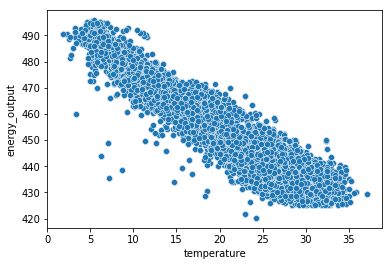

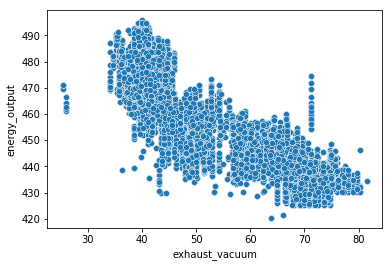

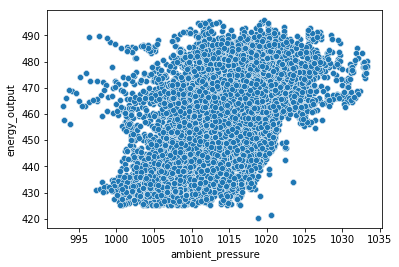

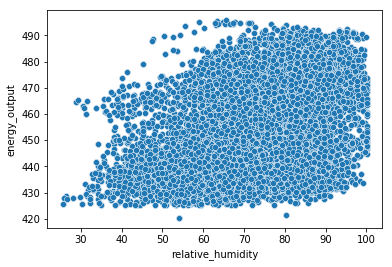

In [53]:
for i in con:
    sns.scatterplot(i,'energy_output',data=df)
    plt.show()

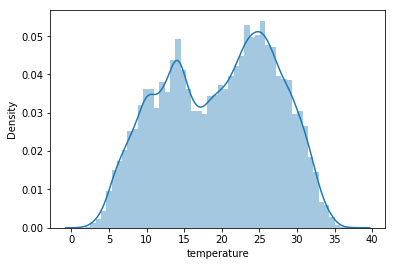

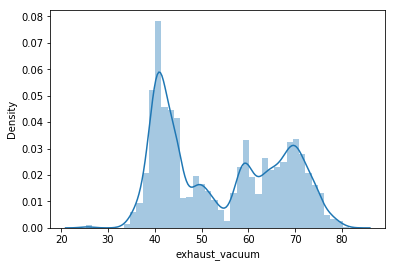

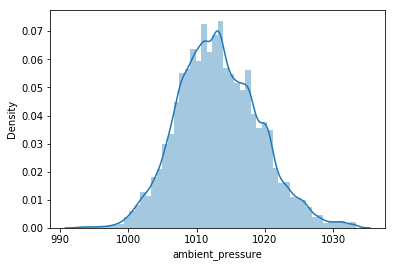

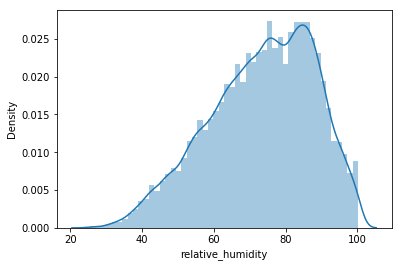

In [54]:
for i in con:
    sns.distplot(df[i])
    plt.show()

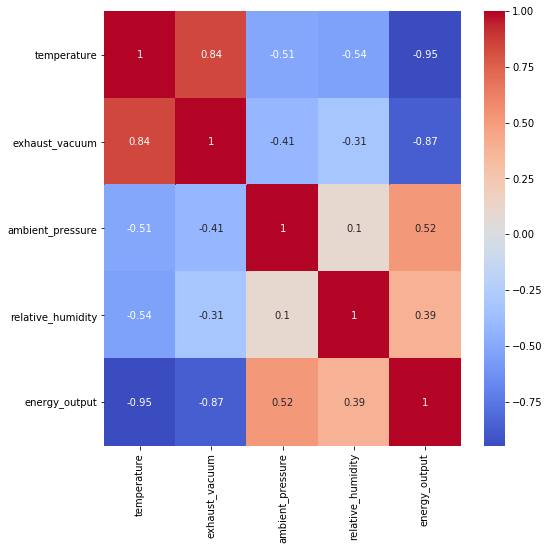

In [55]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [56]:
x=df.drop('energy_output',axis=1)
y=df['energy_output']

In [57]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=5)

In [58]:
print(x.shape)
print(xtrain.shape)
print(xtest.shape)

(47840, 4)
(38272, 4)
(9568, 4)


In [59]:
print(y.shape)
print(ytrain.shape)
print(ytest.shape)

(47840,)
(38272,)
(9568,)


In [60]:
from sklearn.linear_model import LinearRegression
algo=LinearRegression()

In [61]:
algo.fit(xtrain,ytrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
pred=algo.predict(xtest)

In [63]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(ytest,pred))

20.74474123322039


In [67]:
file=open('model.pkl','wb')


In [68]:
pickle.dump(algo,file)

In [70]:
new_data=np.array([[31.25,69,1000,36]])
regression.predict(new_data)

array([433.04234835])

In [ ]:
algo.intercept_

In [ ]:
algo.coef_